# Assignment on Linear Regression
#### `Model the price of cars with the available independent variables`

## Index of Notebook
1. [Business Objective](#Business-Objective)
2. [Loading Dataset](#Loading-Dataset)
3. [Cleaning Dataset](#Cleaning-Dataset)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Dumify Categorical Fields](#Dumify-Categorical-Fields)
    * [Binary Categorical Fields](#Binary-Categorical-Fields)
    * [Multiple Category Fields](#Multiple-Category-Fields)
6. [Data Preparation for Modelling](#Data-Preparation-for-Modelling)
    * [Removing Outliers](#Removing-Outliers)
    * [Splitting dtatset into train and test set](#Splitting-dtatset-into-train-and-test-set)
    * [Transformation of test and train set](#Transformation-of-test-and-train-set)
7. [Automated selection of Predictors](#Automated-selection-of-Predictors)
8. [Manual selection of Predictors](#Manual-selection-of-Predictors)
9. [Linear Regression for single predictor](#Linear-Regression-for-single-predictor)
10. [Linear Regression for multiple predictors](#Linear-Regression-for-multiple-predictors)
11. [Model evaluation](#Model-evaluation)
12. [Visualization and Conclusion of final model](#Visualization-and-Conclusion-of-final-model)

----

## Business Objective

We need to help the company's management to understand the car pricing and its dependencies in the new market so that they can come up with a good business strategy.

In other words, it is required to model the price of car with the available independent variables. The model should be able to illustrate the affect of certain independent variables on the price of car, thus, helping the management understand how exactly the price vary with independent variables. This would further help the management to form some effective business strategy and help them understand the pricing dynamics of the new market.

----

## Loading Dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.15.4 | Pandas version: 0.23.4 | Seaborn version: 0.9.0'

In [2]:
# Importing the data for analysis
df_dict = pd.read_excel('Data Dictionary - carprices.xlsx', skiprows=4, usecols="G,H,L")
df_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255 

In [4]:
# Displaying some data from 'Data Dictionary - carprices.xlsx'
# Removing extra NA rows (not needed)
df_dict = df_dict[:-2]
df_dict

,1,Car_ID,Unique id of each observation (Interger)
0,2.0,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
1,3.0,carCompany,Name of car company (Categorical)
2,4.0,fueltype,Car fuel type i.e gas or diesel (Categorical)
3,5.0,aspiration,Aspiration used in a car (Categorical)
4,6.0,doornumber,Number of doors in a car (Categorical)
5,7.0,carbody,body of car (Categorical)
6,8.0,drivewheel,type of drive wheel (Categorical)
7,9.0,enginelocation,Location of car engine (Categorical)
8,10.0,wheelbase,Weelbase of car (Numeric)
9,11.0,carlength,Length of car (Numeric)


In [5]:
# Displaying some data from 'CarPrice_Assignment.csv'
df_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(205, 26)

Count of dataframe:
car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

Columns in dataframe:
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stro

**Summary**:
1. There are 205 rows and 26 columns in dataframe
2. These 26 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. The dataset is clean, i.e. no missing values

----

## Cleaning Dataset

In [7]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')
df_data


Shape of dataframe:
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [8]:
# We need to consider only company name as the independent variable for model building
# Getting company name from CarName and saving it in CompanyName field
df_data['carCompany'] = df_data['CarName'].str.split().str.get(0)
# Removing CarName field as we do not need it for building model
df_data.drop(columns=['CarName'], inplace=True)
# Removing car_id field as we do not need it for building model
df_data.drop(columns=['car_ID'], inplace=True)
# Displaying dataset
df_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


In [9]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(205, 25)

Count of dataframe:
symboling           205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
carCompany          205
dtype: int64

Columns in dataframe:
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
      

In [10]:
# Separating numerical and categorical fields for analysisng them separately.
# OUTCOME COLUMN: 'price'
# NUMERICAL COLUMNS: 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'
num_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# CATEGORICAL COLUMNS: 'symboling', 'carCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
cat_col = ['symboling', 'carCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',df_data[col].unique())

symboling  :  [ 3  1  2  0 -1 -2]
carCompany  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
fueltype  :  ['gas' 'diesel']
aspiration  :  ['std' 'turbo']
doornumber  :  ['two' 'four']
carbody  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel  :  ['rwd' 'fwd' '4wd']
enginelocation  :  ['front' 'rear']
enginetype  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


**Note**: We have inconsistencies in carCompany field, thus correcting them.

In [11]:
df_data['carCompany'] = df_data['carCompany'].str.replace('maxda','mazda')
df_data['carCompany'] = df_data['carCompany'].str.replace('Nissan','nissan')
df_data['carCompany'] = df_data['carCompany'].str.replace('porcshce','porsche')
df_data['carCompany'] = df_data['carCompany'].str.replace('toyouta','toyota')
df_data['carCompany'] = df_data['carCompany'].str.replace('vokswagen','volkswagen')
df_data['carCompany'] = df_data['carCompany'].str.replace('vw','volkswagen')
df_data['carCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

----

## Exploratory Data Analysis

In [12]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]])

In [13]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df_data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df_data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

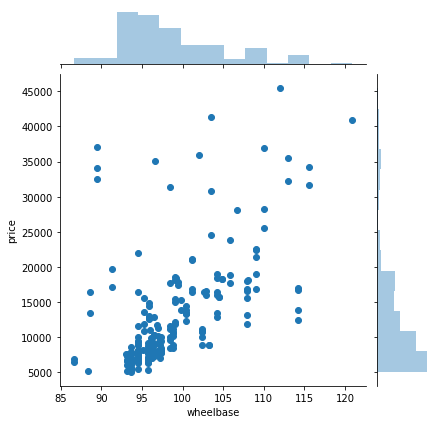

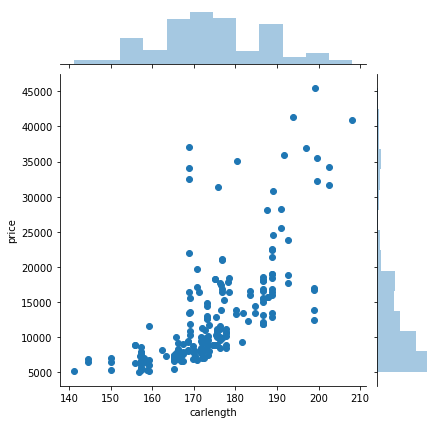

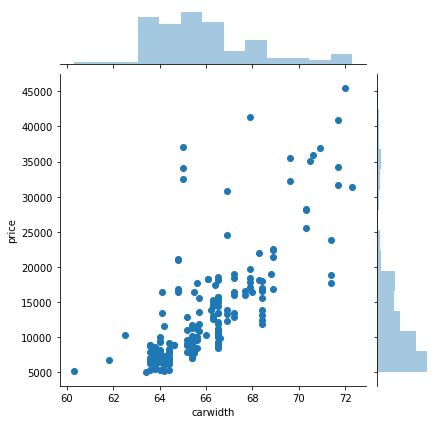

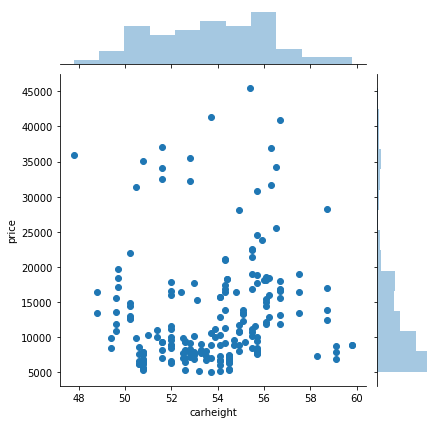

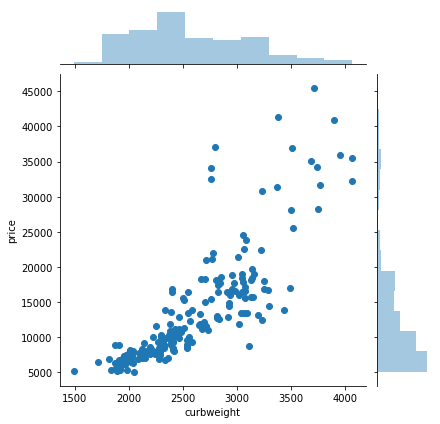

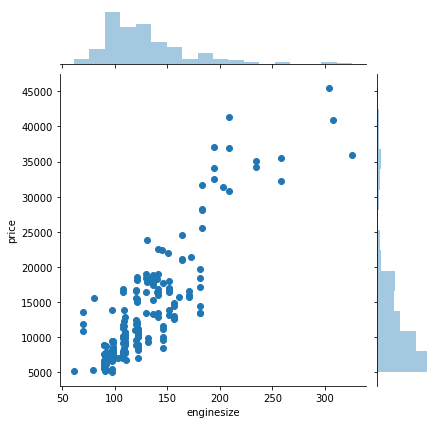

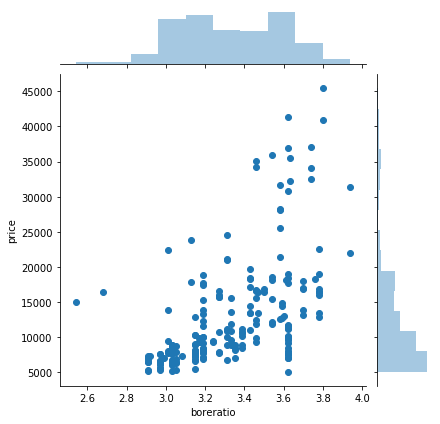

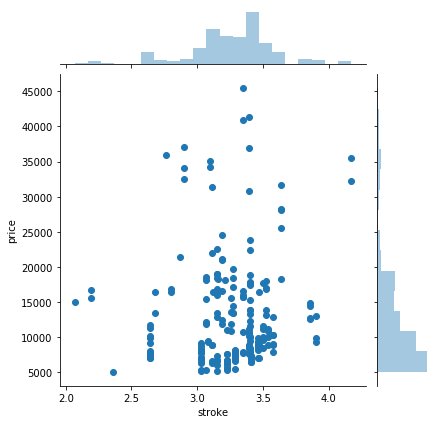

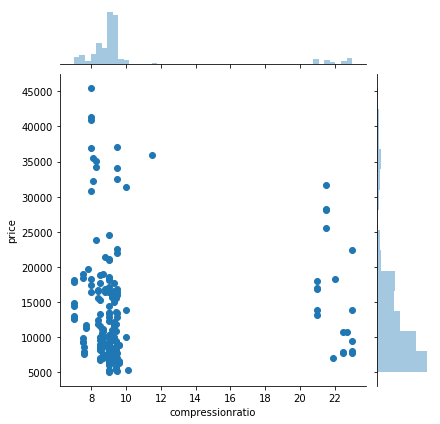

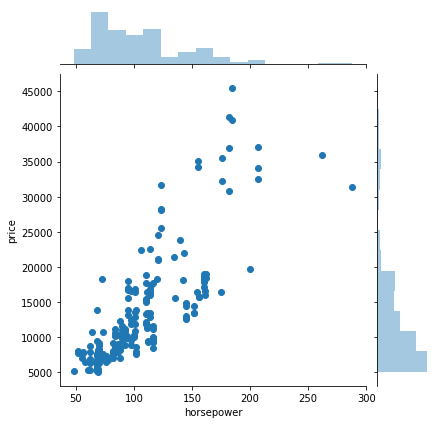

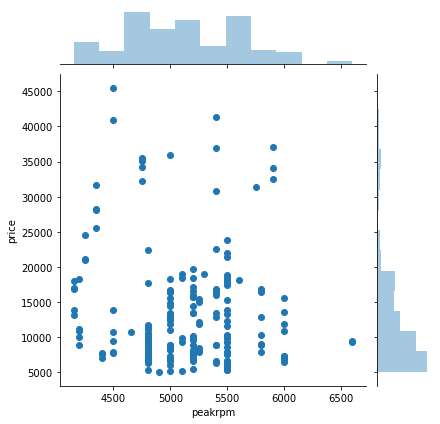

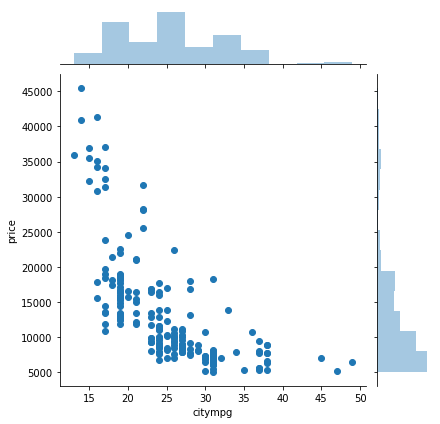

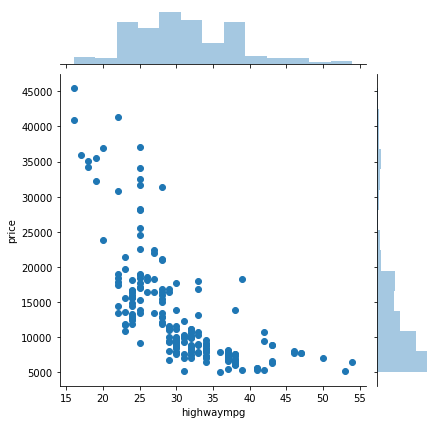

In [14]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, 'price')

<Figure size 432x288 with 0 Axes>

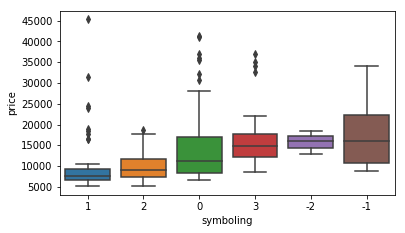

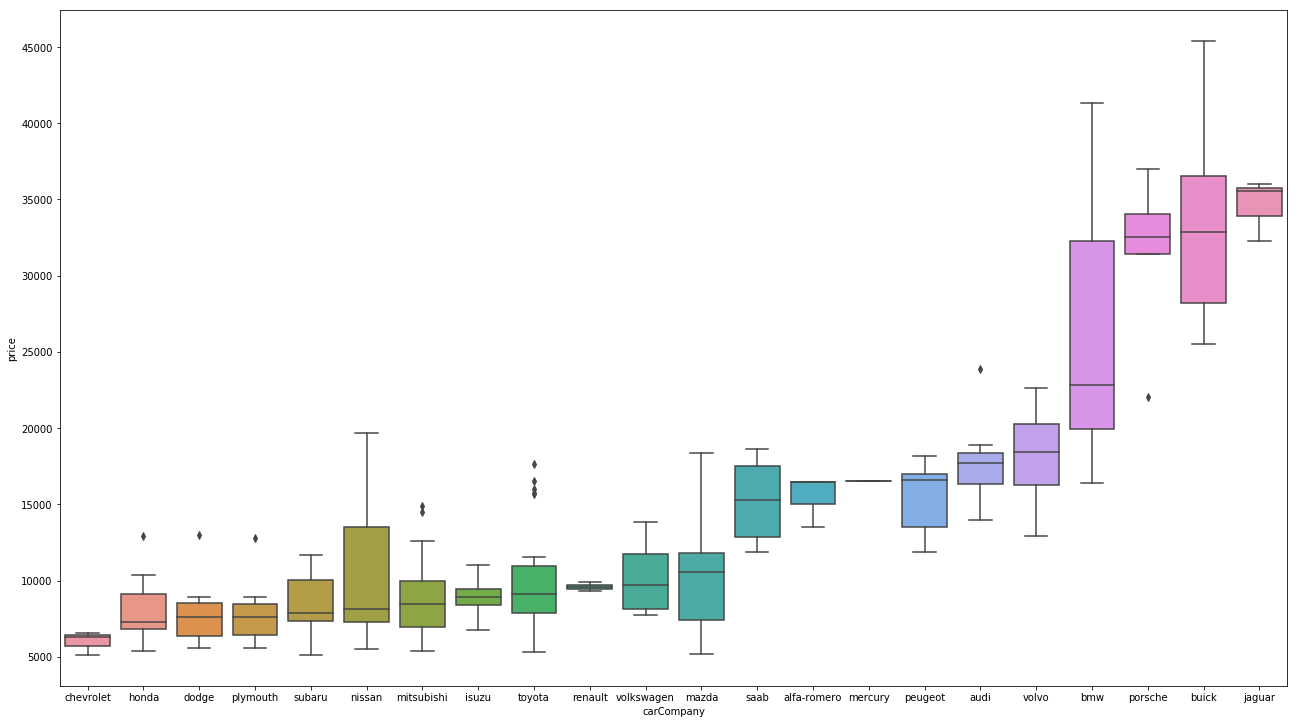

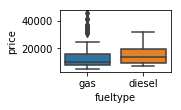

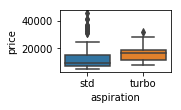

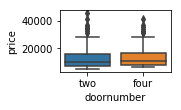

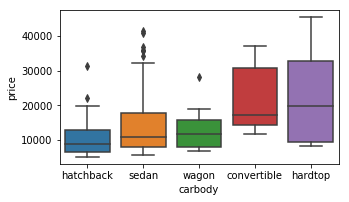

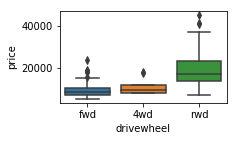

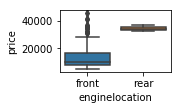

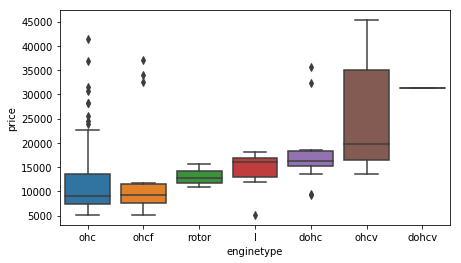

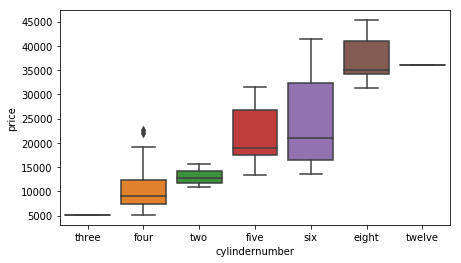

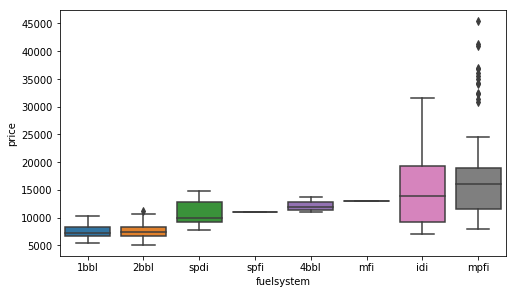

In [15]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, 'price')

----

## Dumify Categorical Fields

In [16]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df_data[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df_data = pd.concat([df_data, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df_data.drop([col], axis = 1, inplace = True)

df_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


----

## Data Preparation for Modelling

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
# Rescaling the Features using MinMax scaling
scaler = MinMaxScaler()

In [19]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[num_col] = scaler.fit_transform(df_train[num_col])

df_train.head()

C:\Users\raiam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('price') # Just the 'price' column
X_train = df_train # Every column except 'price' column

----

## Automated selection of Predictors

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [23]:
# Ranking of columns w.r.t ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 15),
 ('symboling_-1', False, 26),
 ('symboling_0', False, 36),
 ('symboling_1', False, 38),
 ('symboling_2', False, 37),
 ('symboling_3', False, 39),
 ('carCompany_audi', False, 25),
 ('carCompany_bmw', True, 1),
 ('carCompany_buick', False, 33),
 ('carCompany_chevrolet', False, 12),
 ('carCompany_dodge', False, 7),
 ('carCompany_honda', False, 10),
 ('carCompany_isuzu', False, 34),
 ('carCompany_jaguar', False, 16),
 ('carCompany_mazda', False, 29),
 ('carCompany_mercury', False, 47),
 ('carCompany_mitsubishi', True, 1),
 ('carCompany_nissan', False, 31),
 ('carCompany_peugeot', True, 1),
 ('carCompany_plymouth', False, 6),
 ('carCompany_porsche', True, 1),


In [24]:
# Listing out the top 20 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'carCompany_bmw', 'carCompany_mitsubishi',
       'carCompany_peugeot', 'carCompany_porsche', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [25]:
# Listing out the columns that are rejected in RFE (Automated selection of Predictors)
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'citympg',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'carCompany_audi', 'carCompany_buick',
       'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda',
       'carCompany_mercury', 'carCompany_nissan', 'carCompany_plymouth',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtyp

----

## Manual selection of Predictors

----

## Linear Regression for single predictor

In [26]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_sp(col):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[col])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {col}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Let's visualise the data with a scatter plot and the fitted regression line
    print('='*78)
    print(f'Scatterplot with fitted regression line for model built considering {col}')
    print('='*78)
    plt.scatter(X_train_lm.iloc[:, 1], y_train)
    plt.plot(X_train_lm.iloc[:, 1], lr.params[0] + lr.params[1]*X_train_lm.iloc[:, 1], 'r')
    plt.show()
    print('='*78)
    
    return [col,lr.rsquared_adj,lr.fvalue,lr.pvalues[1]]

Parameters obtained for wheelbase
const         3335.655155
wheelbase    23643.231914
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     89.25
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-16
Time:                        12:23:38   Log-Likelihood:                -1449.0
No. Observations:                 143   AIC:                             2902.
Df Residuals:                     141   BIC:                             2908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

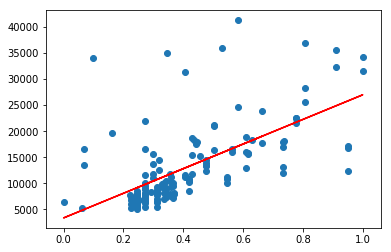

Parameters obtained for carlength
const        -1237.654949
carlength    27202.000081
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.46e-23
Time:                        12:23:38   Log-Likelihood:                -1433.2
No. Observations:                 143   AIC:                             2870.
Df Residuals:                     141   BIC:                             2876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

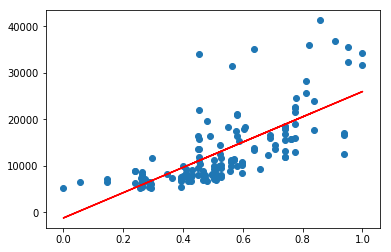

Parameters obtained for carwidth
const       -2557.894956
carwidth    33822.317280
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.32e-33
Time:                        12:23:39   Log-Likelihood:                -1411.2
No. Observations:                 143   AIC:                             2826.
Df Residuals:                     141   BIC:                             2832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

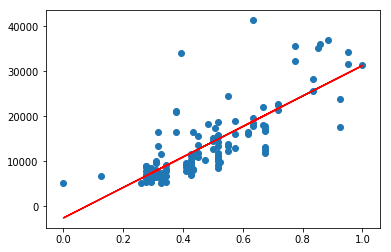

Parameters obtained for carheight
const        11273.460665
carheight     3502.694892
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.329
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.251
Time:                        12:23:39   Log-Likelihood:                -1483.4
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

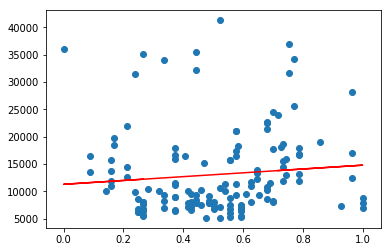

Parameters obtained for curbweight
const            66.067549
curbweight    31848.413865
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.06e-43
Time:                        12:23:39   Log-Likelihood:                -1387.0
No. Observations:                 143   AIC:                             2778.
Df Residuals:                     141   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

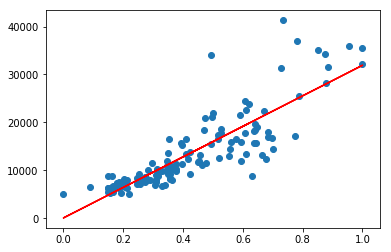

Parameters obtained for enginesize
const          2479.658045
enginesize    43822.834040
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.09e-44
Time:                        12:23:40   Log-Likelihood:                -1384.0
No. Observations:                 143   AIC:                             2772.
Df Residuals:                     141   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

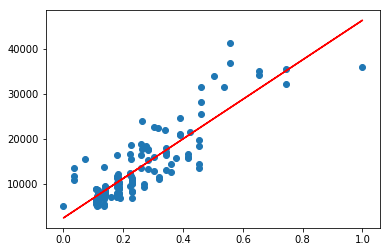

Parameters obtained for boreratio
const         3042.223725
boreratio    20110.842505
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     56.13
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.80e-12
Time:                        12:23:40   Log-Likelihood:                -1460.1
No. Observations:                 143   AIC:                             2924.
Df Residuals:                     141   BIC:                             2930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

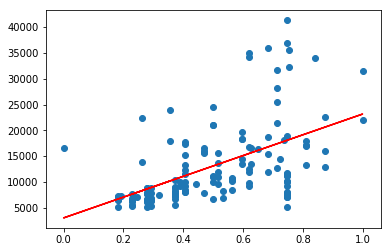

Parameters obtained for stroke
const     9009.562254
stroke    7558.590434
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.372
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0684
Time:                        12:23:41   Log-Likelihood:                -1482.4
No. Observations:                 143   AIC:                             2969.
Df Residuals:                     141   BIC:                             2975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

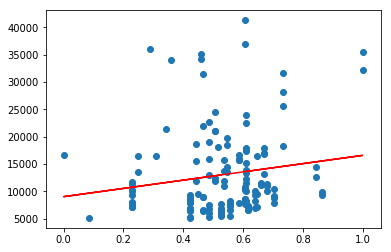

Parameters obtained for compressionratio
const               12046.236548
compressionratio     5294.450310
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.745
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0550
Time:                        12:23:41   Log-Likelihood:                -1482.2
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

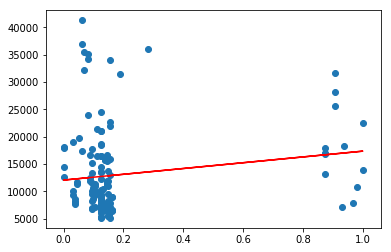

Parameters obtained for horsepower
const          4412.744695
horsepower    38026.976303
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.04e-34
Time:                        12:23:42   Log-Likelihood:                -1409.0
No. Observations:                 143   AIC:                             2822.
Df Residuals:                     141   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

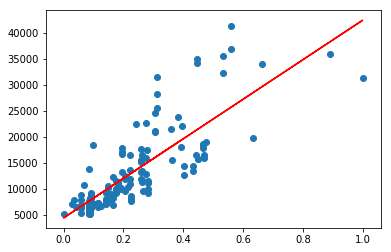

Parameters obtained for peakrpm
const      15082.277799
peakrpm    -5064.464808
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.327
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.129
Time:                        12:23:43   Log-Likelihood:                -1482.9
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

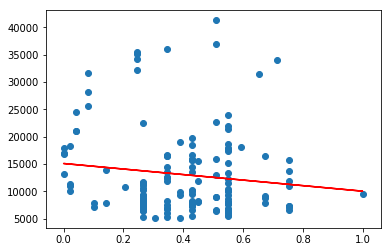

Parameters obtained for citympg
const      22789.646845
citympg   -28277.102679
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.68e-20
Time:                        12:23:43   Log-Likelihood:                -1440.7
No. Observations:                 143   AIC:                             2885.
Df Residuals:                     141   BIC:                             2891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

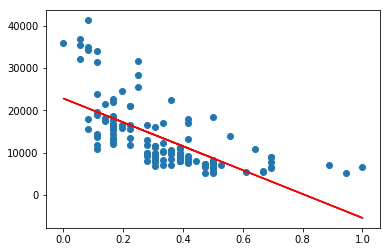

Parameters obtained for highwaympg
const         23748.503983
highwaympg   -28514.214161
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.10e-21
Time:                        12:23:43   Log-Likelihood:                -1438.2
No. Observations:                 143   AIC:                             2880.
Df Residuals:                     141   BIC:                             2886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

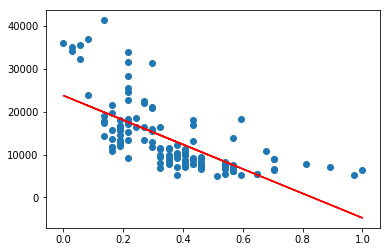

Parameters obtained for symboling_-1
const           12295.151285
symboling_-1     8373.156408
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.93
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           0.000170
Time:                        12:23:44   Log-Likelihood:                -1476.9
No. Observations:                 143   AIC:                             2958.
Df Residuals:                     141   BIC:                             2964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------

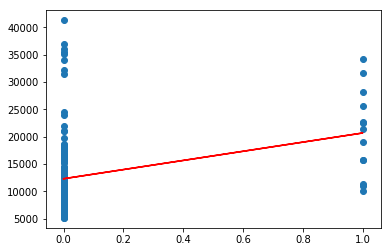

Parameters obtained for symboling_0
const          12605.88172
symboling_0     1288.33162
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8848
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.348
Time:                        12:23:45   Log-Likelihood:                -1483.6
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

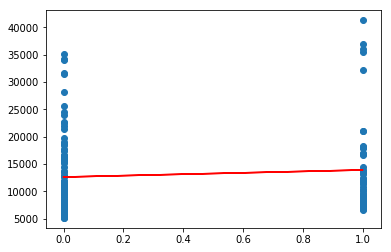

Parameters obtained for symboling_1
const          14644.386670
symboling_1    -5281.154112
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     15.13
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           0.000154
Time:                        12:23:45   Log-Likelihood:                -1476.8
No. Observations:                 143   AIC:                             2958.
Df Residuals:                     141   BIC:                             2964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------

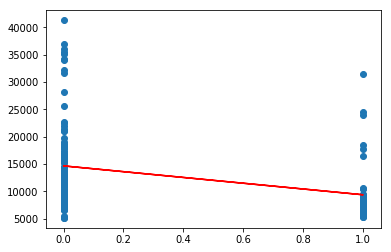

Parameters obtained for symboling_2
const          13419.656087
symboling_2    -3056.067852
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.317
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.130
Time:                        12:23:46   Log-Likelihood:                -1482.9
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------

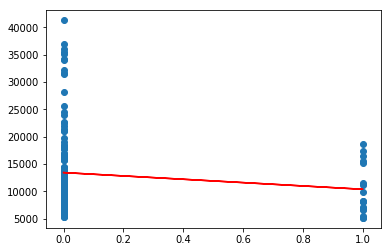

Parameters obtained for symboling_3
const          12568.989336
symboling_3     3871.788442
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.950
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0488
Time:                        12:23:46   Log-Likelihood:                -1482.1
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------

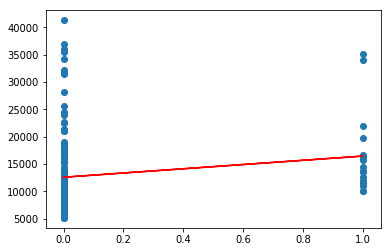

Parameters obtained for carCompany_audi
const              12861.692029
carCompany_audi     5567.141371
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.479
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.118
Time:                        12:23:46   Log-Likelihood:                -1482.8
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

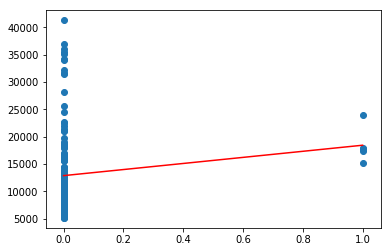

Parameters obtained for carCompany_bmw
const             12451.041365
carCompany_bmw    14426.458635
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     22.62
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.83e-06
Time:                        12:23:47   Log-Likelihood:                -1473.4
No. Observations:                 143   AIC:                             2951.
Df Residuals:                     141   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

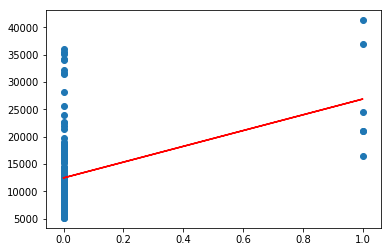

Parameters obtained for carCompany_buick
const               12408.823674
carCompany_buick    18519.176326
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     33.33
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.75e-08
Time:                        12:23:47   Log-Likelihood:                -1468.9
No. Observations:                 143   AIC:                             2942.
Df Residuals:                     141   BIC:                             2948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

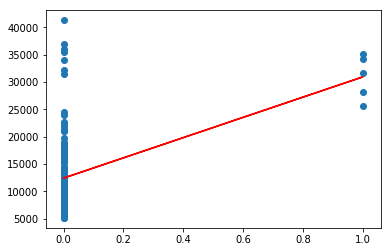

Parameters obtained for carCompany_chevrolet
const                   13207.404764
carCompany_chevrolet    -7200.404764
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.525
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.114
Time:                        12:23:48   Log-Likelihood:                -1482.8
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.02

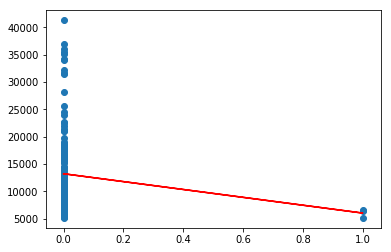

Parameters obtained for carCompany_dodge
const               13326.077861
carCompany_dodge    -6428.577861
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.979
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0480
Time:                        12:23:48   Log-Likelihood:                -1482.1
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

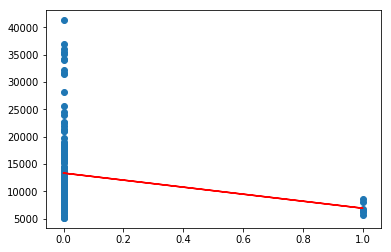

Parameters obtained for carCompany_honda
const               13404.109455
carCompany_honda    -5525.553900
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.324
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0394
Time:                        12:23:49   Log-Likelihood:                -1481.9
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

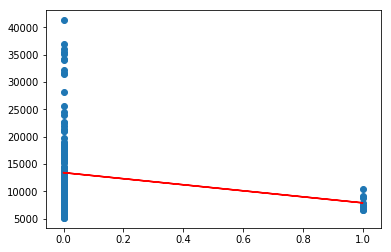

Parameters obtained for carCompany_isuzu
const               13160.283336
carCompany_isuzu    -4954.283336
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.184
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.278
Time:                        12:23:50   Log-Likelihood:                -1483.5
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

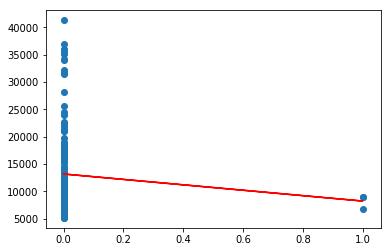

Parameters obtained for carCompany_jaguar
const                12594.697621
carCompany_jaguar    22005.302379
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     27.73
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.11e-07
Time:                        12:23:50   Log-Likelihood:                -1471.2
No. Observations:                 143   AIC:                             2946.
Df Residuals:                     141   BIC:                             2952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975

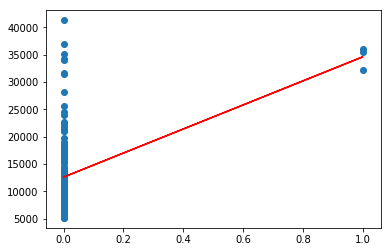

Parameters obtained for carCompany_mazda
const               13316.335900
carCompany_mazda    -2859.874362
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.209
Time:                        12:23:50   Log-Likelihood:                -1483.3
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

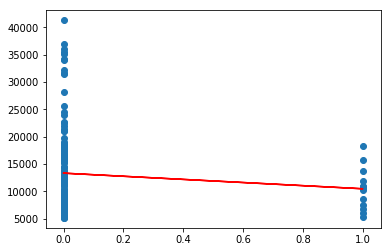

Parameters obtained for carCompany_mercury
const                 13056.347322
carCompany_mercury        0.000000
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Jan 2019   Prob (F-statistic):                nan
Time:                        12:23:51   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     142   BIC:                             2973.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

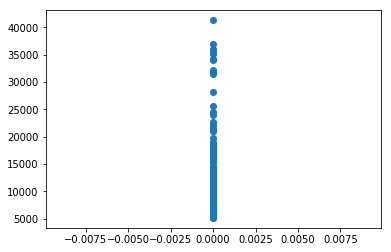

Parameters obtained for carCompany_mitsubishi
const                    13326.691545
carCompany_mitsubishi    -4295.469323
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.581
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.110
Time:                        12:23:51   Log-Likelihood:                -1482.8
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [

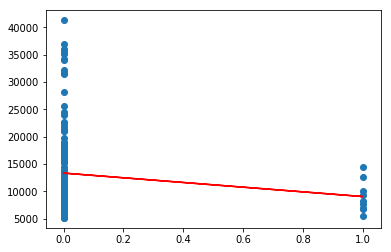

Parameters obtained for carCompany_nissan
const                13380.400519
carCompany_nissan    -3309.971948
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.291
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.132
Time:                        12:23:52   Log-Likelihood:                -1482.9
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975

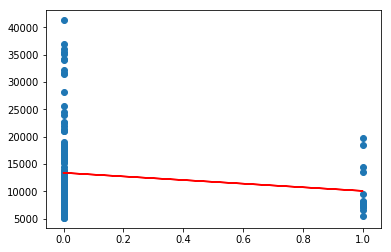

Parameters obtained for carCompany_peugeot
const                 12909.241978
carCompany_peugeot     2629.508022
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8559
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.356
Time:                        12:23:52   Log-Likelihood:                -1483.7
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

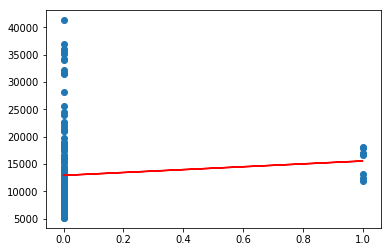

Parameters obtained for carCompany_plymouth
const                  13227.127101
carCompany_plymouth    -6105.377101
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.401
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.123
Time:                        12:23:53   Log-Likelihood:                -1482.9
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     141   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025   

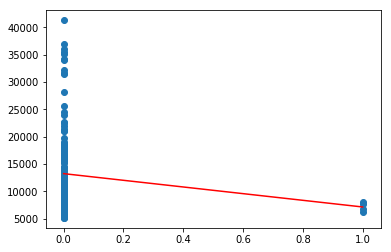

Parameters obtained for carCompany_porsche
const                 12711.508336
carCompany_porsche    16437.324998
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     14.23
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           0.000237
Time:                        12:23:54   Log-Likelihood:                -1477.2
No. Observations:                 143   AIC:                             2958.
Df Residuals:                     141   BIC:                             2964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

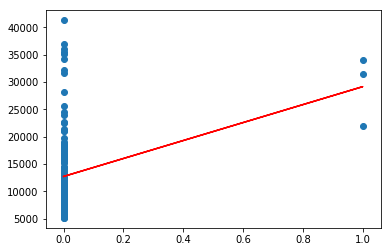

Parameters obtained for carCompany_renault
const                 13105.444447
carCompany_renault    -3510.444447
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3970
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.530
Time:                        12:23:54   Log-Likelihood:                -1483.9
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

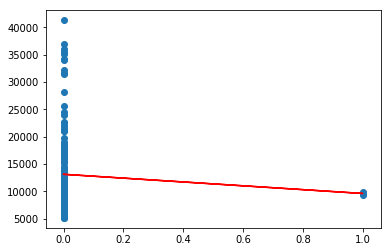

Parameters obtained for carCompany_saab
const              13007.697621
carCompany_saab     2318.969045
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2578
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.612
Time:                        12:23:55   Log-Likelihood:                -1484.0
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

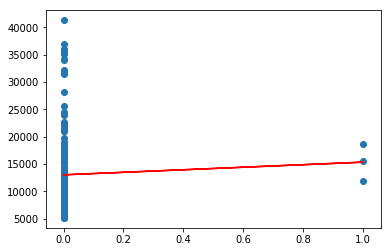

Parameters obtained for carCompany_subaru
const                13425.497477
carCompany_subaru    -4798.952023
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.915
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0498
Time:                        12:23:56   Log-Likelihood:                -1482.1
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975

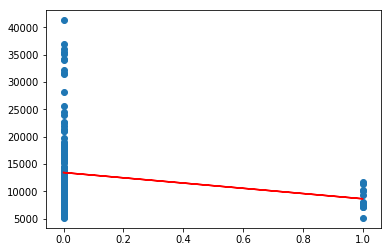

Parameters obtained for carCompany_toyota
const                13523.672089
carCompany_toyota    -3341.372089
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.200
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0758
Time:                        12:23:56   Log-Likelihood:                -1482.5
No. Observations:                 143   AIC:                             2969.
Df Residuals:                     141   BIC:                             2975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975

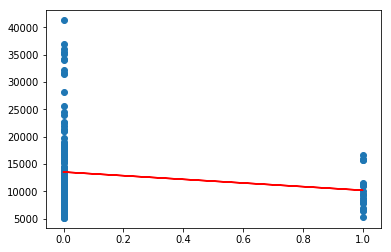

Parameters obtained for carCompany_volkswagen
const                    13160.901963
carCompany_volkswagen    -2135.901963
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4965
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.482
Time:                        12:23:57   Log-Likelihood:                -1483.8
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [

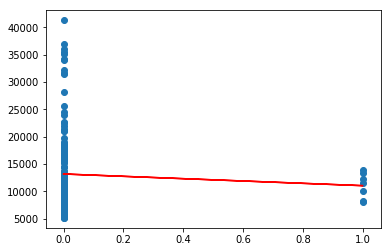

Parameters obtained for carCompany_volvo
const               12792.720197
carCompany_volvo     6283.113136
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.796
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0533
Time:                        12:23:57   Log-Likelihood:                -1482.2
No. Observations:                 143   AIC:                             2968.
Df Residuals:                     141   BIC:                             2974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

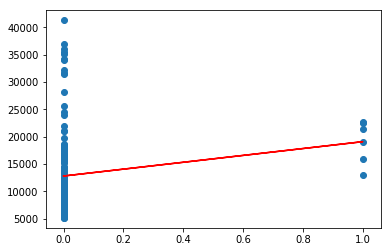

Parameters obtained for fueltype_gas
const           17758.923077
fueltype_gas    -5172.833331
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.347
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0222
Time:                        12:23:58   Log-Likelihood:                -1481.4
No. Observations:                 143   AIC:                             2967.
Df Residuals:                     141   BIC:                             2973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------

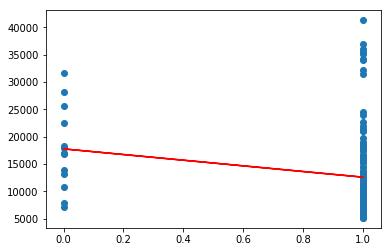

Parameters obtained for aspiration_turbo
const               12298.884615
aspiration_turbo     4166.044885
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.283
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0133
Time:                        12:23:59   Log-Likelihood:                -1481.0
No. Observations:                 143   AIC:                             2966.
Df Residuals:                     141   BIC:                             2972.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

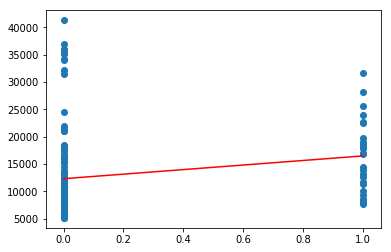

Parameters obtained for doornumber_two
const             13580.593750
doornumber_two    -1189.956179
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8178
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.367
Time:                        12:23:59   Log-Likelihood:                -1483.7
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

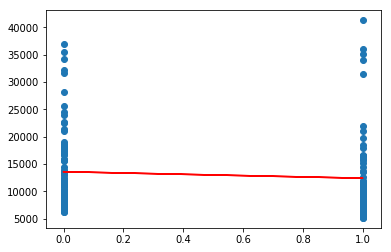

Parameters obtained for carbody_hardtop
const              12954.154764
carbody_hardtop     4871.178569
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.145
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.287
Time:                        12:24:00   Log-Likelihood:                -1483.5
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

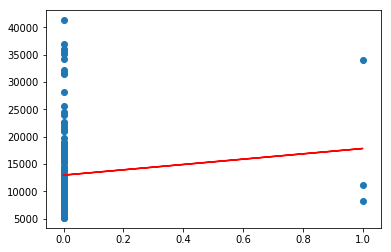

Parameters obtained for carbody_hatchback
const                14474.521277
carbody_hatchback    -4138.752562
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     9.600
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00235
Time:                        12:24:00   Log-Likelihood:                -1479.4
No. Observations:                 143   AIC:                             2963.
Df Residuals:                     141   BIC:                             2969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975

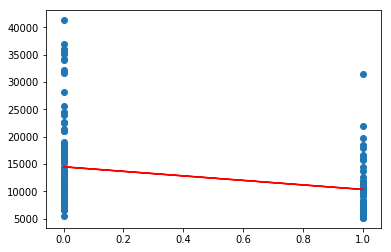

Parameters obtained for carbody_sedan
const            11537.622227
carbody_sedan     3193.789538
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     6.187
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0140
Time:                        12:24:01   Log-Likelihood:                -1481.0
No. Observations:                 143   AIC:                             2966.
Df Residuals:                     141   BIC:                             2972.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------

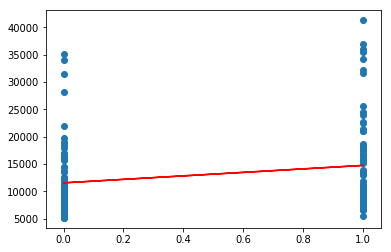

Parameters obtained for carbody_wagon
const            13212.182798
carbody_wagon    -1172.867009
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3702
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.544
Time:                        12:24:02   Log-Likelihood:                -1483.9
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------

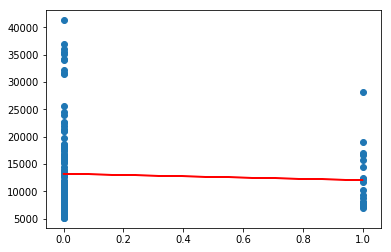

Parameters obtained for drivewheel_fwd
const             19038.666672
drivewheel_fwd   -10064.372555
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     95.37
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.59e-17
Time:                        12:24:03   Log-Likelihood:                -1447.1
No. Observations:                 143   AIC:                             2898.
Df Residuals:                     141   BIC:                             2904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

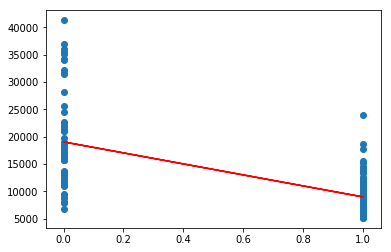

Parameters obtained for drivewheel_rwd
const              9193.53943
drivewheel_rwd    11047.63057
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.61e-20
Time:                        12:24:03   Log-Likelihood:                -1440.2
No. Observations:                 143   AIC:                             2884.
Df Residuals:                     141   BIC:                             2890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------

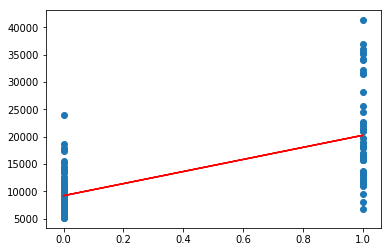

Parameters obtained for enginelocation_rear
const                  12908.659627
enginelocation_rear    21119.340373
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     7.605
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00659
Time:                        12:24:04   Log-Likelihood:                -1480.3
No. Observations:                 143   AIC:                             2965.
Df Residuals:                     141   BIC:                             2971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025   

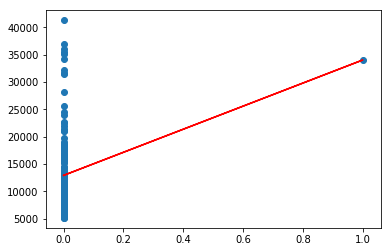

Parameters obtained for enginetype_dohcv
const               12927.163148
enginetype_dohcv    18473.336852
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.746
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0178
Time:                        12:24:05   Log-Likelihood:                -1481.2
No. Observations:                 143   AIC:                             2966.
Df Residuals:                     141   BIC:                             2972.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

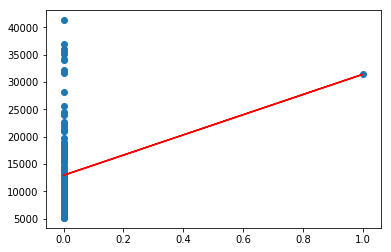

Parameters obtained for enginetype_l
const           12967.139306
enginetype_l     1417.416250
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2766
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.600
Time:                        12:24:06   Log-Likelihood:                -1483.9
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------

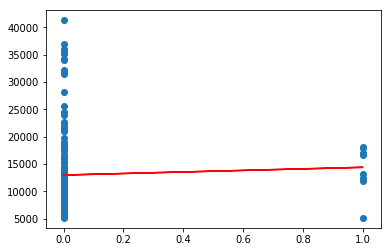

Parameters obtained for enginetype_ohc
const             16467.366667
enginetype_ohc    -4977.303738
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           0.000314
Time:                        12:24:07   Log-Likelihood:                -1477.5
No. Observations:                 143   AIC:                             2959.
Df Residuals:                     141   BIC:                             2965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

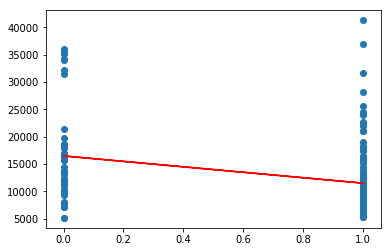

Parameters obtained for enginetype_ohcf
const              13268.226466
enginetype_ohcf    -2524.893132
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.151
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.285
Time:                        12:24:07   Log-Likelihood:                -1483.5
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

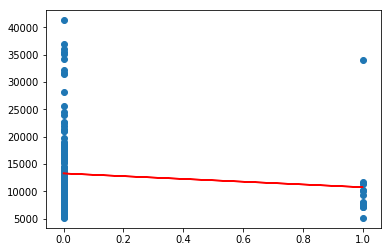

Parameters obtained for enginetype_ohcv
const              12371.915425
enginetype_ohcv    10874.862352
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     18.37
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.36e-05
Time:                        12:24:08   Log-Likelihood:                -1475.3
No. Observations:                 143   AIC:                             2955.
Df Residuals:                     141   BIC:                             2961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

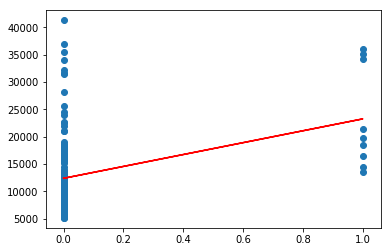

Parameters obtained for enginetype_rotor
const               13057.393288
enginetype_rotor      -37.393288
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                 8.857e-05
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.993
Time:                        12:24:08   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

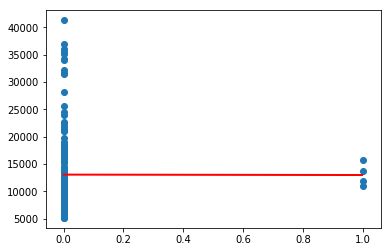

Parameters obtained for cylindernumber_five
const                  12509.093284
cylindernumber_five     8695.258605
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00104
Time:                        12:24:09   Log-Likelihood:                -1478.6
No. Observations:                 143   AIC:                             2961.
Df Residuals:                     141   BIC:                             2967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025   

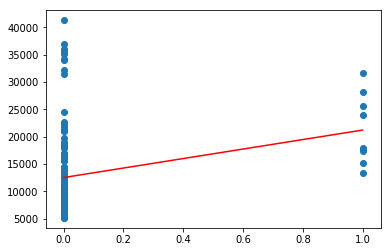

Parameters obtained for cylindernumber_four
const                  22211.369378
cylindernumber_four   -12350.642963
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.75e-22
Time:                        12:24:09   Log-Likelihood:                -1436.9
No. Observations:                 143   AIC:                             2878.
Df Residuals:                     141   BIC:                             2884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025   

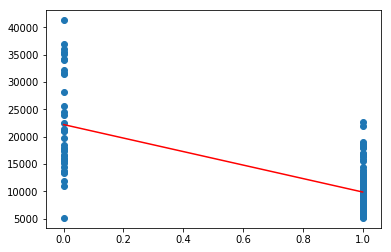

Parameters obtained for cylindernumber_six
const                 11531.836024
cylindernumber_six    11473.953449
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     47.15
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.93e-10
Time:                        12:24:10   Log-Likelihood:                -1463.5
No. Observations:                 143   AIC:                             2931.
Df Residuals:                     141   BIC:                             2937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

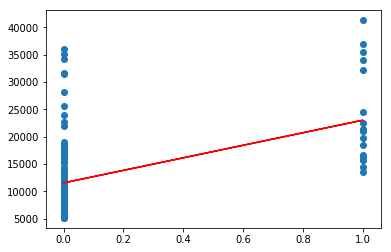

Parameters obtained for cylindernumber_three
const                   13112.018782
cylindernumber_three    -7961.018782
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.033
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.311
Time:                        12:24:11   Log-Likelihood:                -1483.6
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.02

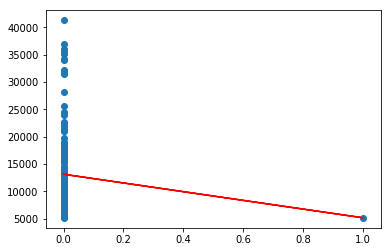

Parameters obtained for cylindernumber_twelve
const                    12894.772303
cylindernumber_twelve    23105.227697
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     9.200
Date:                Sun, 27 Jan 2019   Prob (F-statistic):            0.00288
Time:                        12:24:11   Log-Likelihood:                -1479.6
No. Observations:                 143   AIC:                             2963.
Df Residuals:                     141   BIC:                             2969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [

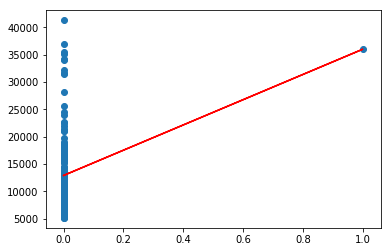

Parameters obtained for cylindernumber_two
const                 13057.393288
cylindernumber_two      -37.393288
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                 8.857e-05
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.993
Time:                        12:24:11   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

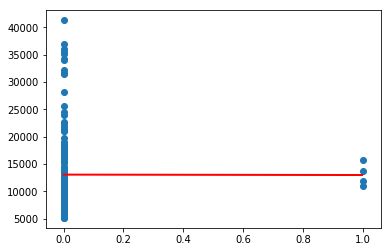

Parameters obtained for fuelsystem_2bbl
const              16124.824376
fuelsystem_2bbl    -8775.844376
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     57.41
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.27e-12
Time:                        12:24:12   Log-Likelihood:                -1459.7
No. Observations:                 143   AIC:                             2923.
Df Residuals:                     141   BIC:                             2929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

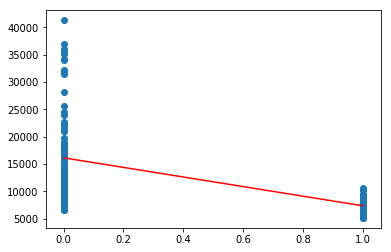

Parameters obtained for fuelsystem_4bbl
const              13075.876193
fuelsystem_4bbl     -930.876193
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.04147
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.839
Time:                        12:24:13   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2972.
Df Residuals:                     141   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

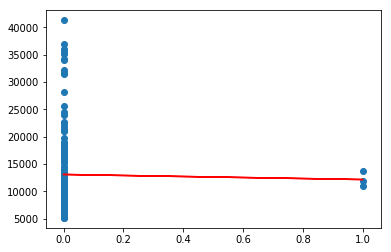

Parameters obtained for fuelsystem_idi
const             12586.089746
fuelsystem_idi     5172.833331
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.347
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0222
Time:                        12:24:13   Log-Likelihood:                -1481.4
No. Observations:                 143   AIC:                             2967.
Df Residuals:                     141   BIC:                             2973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

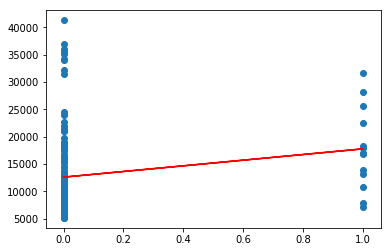

Parameters obtained for fuelsystem_mfi
const             13056.347322
fuelsystem_mfi        0.000000
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Jan 2019   Prob (F-statistic):                nan
Time:                        12:24:14   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     142   BIC:                             2973.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

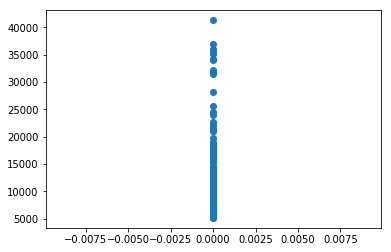

Parameters obtained for fuelsystem_mpfi
const              9466.425000
fuelsystem_mpfi    8148.553841
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     52.25
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.82e-11
Time:                        12:24:14   Log-Likelihood:                -1461.5
No. Observations:                 143   AIC:                             2927.
Df Residuals:                     141   BIC:                             2933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------

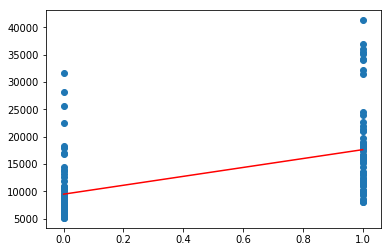

Parameters obtained for fuelsystem_spdi
const              13175.588810
fuelsystem_spdi    -2841.922144
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7604
Date:                Sun, 27 Jan 2019   Prob (F-statistic):              0.385
Time:                        12:24:15   Log-Likelihood:                -1483.7
No. Observations:                 143   AIC:                             2971.
Df Residuals:                     141   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

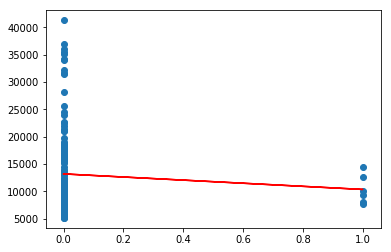

Parameters obtained for fuelsystem_spfi
const              13056.347322
fuelsystem_spfi        0.000000
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Jan 2019   Prob (F-statistic):                nan
Time:                        12:24:16   Log-Likelihood:                -1484.1
No. Observations:                 143   AIC:                             2970.
Df Residuals:                     142   BIC:                             2973.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

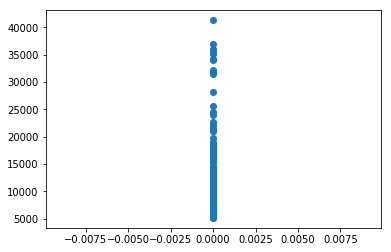

In [27]:
# let's start with each single relevant fields (from RFE's selected fields)
single_field_model_table = []
for e in list(df_data.loc[:, df_data.columns != 'price']):
    single_field_model_table.append(make_lr_model_sp(e))

In [28]:
# Summarizing the above analysis on basis of major statistical parameters 
# and displaying in order of the significance of column in model building
pd.DataFrame(
    single_field_model_table,columns=['Column Name','Adjusted R-square','F-statistics','p-value']
).sort_values(
    by=['Adjusted R-square','F-statistics','p-value'], ascending=[0,0,1]
)

,Column Name,Adjusted R-square,F-statistics,p-value
5,enginesize,0.751526,430.488900,1.091420e-44
4,curbweight,0.740978,407.216278,2.060227e-43
9,horsepower,0.647448,261.777750,6.044183e-34
2,carwidth,0.636448,249.591029,5.316620e-33
1,carlength,0.505958,146.424930,1.459192e-23
56,cylindernumber_four,0.479717,131.928584,5.750673e-22
12,highwaympg,0.470149,126.999719,2.098423e-21
47,drivewheel_rwd,0.454718,119.415766,1.613437e-20
11,citympg,0.450799,117.557542,2.684155e-20
46,drivewheel_fwd,0.399251,95.371494,1.587671e-17


#### Clearly, we get fine Adjusted R-square values, upto 0.753 i.e. a model that explains 75.2% of the variations using Linear Regression for Single predictor. Let's see if we can do better using multiple predictors

----

## Linear Regression for multiple predictors

In [29]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [30]:
# MODEL 1
# Let's consider all the columns for our first model
make_lr_model_mp(list(df_data.loc[:, df_data.columns != 'price']))

Parameters obtained for ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'carCompany_audi', 'carCompany_bmw', 'carCompany_buick', 'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda', 'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan', 'carCompany_peugeot', 'carCompany_plymouth', 'carCompany_porsche', 'carCompany_renault', 'carCompany_saab', 'carCompany_subaru', 'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'en

                 Features          VIF
58   cylindernumber_three          inf
60     cylindernumber_two          inf
50           enginetype_l          inf
52        enginetype_ohcf          inf
54       enginetype_rotor          inf
35      carCompany_subaru          inf
30     carCompany_peugeot          inf
48    enginelocation_rear          inf
39           fueltype_gas  3131.440000
63         fuelsystem_idi   804.640000
56    cylindernumber_four   475.840000
5              enginesize   383.020000
8        compressionratio   323.660000
9              horsepower    94.150000
6               boreratio    93.670000
57     cylindernumber_six    90.730000
55    cylindernumber_five    87.050000
65        fuelsystem_mpfi    73.350000
11                citympg    65.830000
14            symboling_0    56.070000
4              curbweight    56.060000
61        fuelsystem_2bbl    55.560000
15            symboling_1    53.400000
12             highwaympg    53.250000
44          carbody_sedan

**MODEL 1 Summary**: Although we achieved a good Adj. R-squared, we have very high VIF and p-value for most of the variables, hence including all variables is not a good idea for building our model.

In [31]:
# MODEL 2
# Let's consider all 20 the columns suggested by RFE for our next model
selected_predictors = set(auto_selected_predictors)
removed_predictors = set()
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_mitsubishi', 'enginetype_dohcv', 'peakrpm', 'enginetype_l', 'curbweight', 'cylindernumber_four', 'cylindernumber_twelve', 'horsepower', 'carwidth', 'enginesize', 'carCompany_bmw', 'carCompany_porsche', 'cylindernumber_five', 'cylindernumber_two', 'enginetype_rotor', 'cylindernumber_three', 'boreratio', 'carCompany_peugeot']
const                    -6954.653959
stroke                   -9257.781361
enginelocation_rear      13104.620522
carCompany_mitsubishi    -2218.172987
enginetype_dohcv           380.097123
peakrpm                   1187.913127
enginetype_l              4759.453073
curbweight               12731.012225
cylindernumber_four       9564.916056
cylindernumber_twelve   -18269.171702
horsepower                3859.803914
carwidth                 12159.980044
enginesize               46665.859391
carCompany_bmw           10406.680874
carCompany_porsche        4718.488924
cylindernumber_five       6438.558

**MODEL 2 Summary**: We are able to achieve good Adj. R-squared. However, some p-values and VIF are still very high.

In [32]:
# MODEL 3
# Let's remove the cylindernumber_three column and build model again
removed_predictors={'cylindernumber_three'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_mitsubishi', 'enginetype_dohcv', 'peakrpm', 'enginetype_l', 'curbweight', 'cylindernumber_four', 'cylindernumber_twelve', 'horsepower', 'carwidth', 'enginesize', 'carCompany_bmw', 'carCompany_porsche', 'cylindernumber_five', 'cylindernumber_two', 'enginetype_rotor', 'boreratio', 'carCompany_peugeot']
const                    -6954.653959
stroke                   -9257.781361
enginelocation_rear      13104.620522
carCompany_mitsubishi    -2218.172987
enginetype_dohcv           380.097123
peakrpm                   1187.913127
enginetype_l             18040.047270
curbweight               12731.012225
cylindernumber_four       9564.916056
cylindernumber_twelve   -18269.171702
horsepower                3859.803914
carwidth                 12159.980044
enginesize               46665.859391
carCompany_bmw           10406.680874
carCompany_porsche        4718.488924
cylindernumber_five       6438.558171
cylindernumber_two  

In [33]:
# MODEL 4
# Let's remove the enginetype_rotor column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_mitsubishi', 'enginetype_dohcv', 'peakrpm', 'enginetype_l', 'curbweight', 'cylindernumber_four', 'cylindernumber_twelve', 'horsepower', 'carwidth', 'enginesize', 'carCompany_bmw', 'carCompany_porsche', 'cylindernumber_five', 'cylindernumber_two', 'boreratio', 'carCompany_peugeot']
const                    -6954.653959
stroke                   -9257.781361
enginelocation_rear      13104.620522
carCompany_mitsubishi    -2218.172987
enginetype_dohcv           380.097123
peakrpm                   1187.913127
enginetype_l             18040.047270
curbweight               12731.012225
cylindernumber_four       9564.916056
cylindernumber_twelve   -18269.171702
horsepower                3859.803914
carwidth                 12159.980044
enginesize               46665.859391
carCompany_bmw           10406.680874
carCompany_porsche        4718.488924
cylindernumber_five       6438.558171
cylindernumber_two       17985.004486
bo

In [34]:
# MODEL 5
# Let's remove the enginetype_dohcv column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_mitsubishi', 'peakrpm', 'enginetype_l', 'curbweight', 'cylindernumber_four', 'cylindernumber_twelve', 'horsepower', 'carwidth', 'enginesize', 'carCompany_bmw', 'carCompany_porsche', 'cylindernumber_five', 'cylindernumber_two', 'boreratio', 'carCompany_peugeot']
const                    -6939.253167
stroke                   -9256.581751
enginelocation_rear      12933.123217
carCompany_mitsubishi    -2222.410635
peakrpm                   1159.650723
enginetype_l             18036.839021
curbweight               12665.725149
cylindernumber_four       9558.842968
cylindernumber_twelve   -18293.224611
horsepower                3994.944206
carwidth                 12201.993660
enginesize               46596.274839
carCompany_bmw           10399.033496
carCompany_porsche        4863.423218
cylindernumber_five       6429.171991
cylindernumber_two       17968.089029
boreratio               -13526.985591
carCompany_peugeot    

In [35]:
# MODEL 6
# Let's remove the peakrpm column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_mitsubishi', 'enginetype_l', 'curbweight', 'cylindernumber_four', 'cylindernumber_twelve', 'horsepower', 'carwidth', 'enginesize', 'carCompany_bmw', 'carCompany_porsche', 'cylindernumber_five', 'cylindernumber_two', 'boreratio', 'carCompany_peugeot']
const                    -6522.316698
stroke                   -9324.716523
enginelocation_rear      13202.843556
carCompany_mitsubishi    -2253.469884
enginetype_l             18188.967674
curbweight               12178.675171
cylindernumber_four       9788.526041
cylindernumber_twelve   -18609.778447
horsepower                5528.680073
carwidth                 12404.234885
enginesize               46180.185130
carCompany_bmw           10397.907207
carCompany_porsche        4799.679088
cylindernumber_five       6574.341256
cylindernumber_two       18427.667253
boreratio               -14022.762598
carCompany_peugeot      -21982.052402
dtype: float64

                 

In [36]:
# MODEL 7
# Let's remove the enginesize column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','enginesize'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_porsche', 'carCompany_mitsubishi', 'enginetype_l', 'horsepower', 'curbweight', 'cylindernumber_five', 'cylindernumber_two', 'cylindernumber_four', 'cylindernumber_twelve', 'boreratio', 'carCompany_peugeot', 'carwidth']
const                    -2020.807573
stroke                    -575.191022
enginelocation_rear      15942.576894
carCompany_bmw            9808.764126
carCompany_porsche        4471.542737
carCompany_mitsubishi    -1913.609911
enginetype_l              8124.470702
horsepower                4338.350699
curbweight               22232.216884
cylindernumber_five        147.140213
cylindernumber_two        2192.514191
cylindernumber_four        896.533836
cylindernumber_twelve     4126.039119
boreratio                -3882.129549
carCompany_peugeot      -13443.252841
carwidth                 13526.033183
dtype: float64

                            OLS Regression Results                   

In [37]:
# MODEL 8
# Let's remove the carCompany_peugeot column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','enginesize','carCompany_peugeot'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_porsche', 'carCompany_mitsubishi', 'enginetype_l', 'horsepower', 'curbweight', 'cylindernumber_five', 'cylindernumber_two', 'cylindernumber_four', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                     1446.560510
stroke                     348.302868
enginelocation_rear      13383.998626
carCompany_bmw            8925.265627
carCompany_porsche        5063.307362
carCompany_mitsubishi    -1588.128678
enginetype_l             -2843.202316
horsepower                2793.320930
curbweight               18663.274742
cylindernumber_five       -441.912658
cylindernumber_two        -140.230695
cylindernumber_four      -1903.051206
boreratio                -1562.003691
cylindernumber_twelve     5796.763652
carwidth                 10961.155804
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:

In [38]:
# MODEL 9
# Let's remove the curbweight column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_porsche', 'carCompany_mitsubishi', 'enginetype_l', 'horsepower', 'cylindernumber_five', 'cylindernumber_two', 'cylindernumber_four', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                     1358.448271
stroke                    2515.543092
enginelocation_rear      15537.683497
carCompany_bmw            8728.783732
carCompany_porsche        -325.100679
carCompany_mitsubishi    -1954.218213
enginetype_l              -991.714331
horsepower                8799.620590
cylindernumber_five      -1363.722005
cylindernumber_two       -2837.934177
cylindernumber_four      -3891.390458
boreratio                 3175.167776
cylindernumber_twelve     6253.598388
carwidth                 20563.427744
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                 

In [39]:
# MODEL 10
# Let's remove the carCompany_porsche column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'enginetype_l', 'horsepower', 'cylindernumber_five', 'cylindernumber_two', 'cylindernumber_four', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                     1398.302059
stroke                    2542.521127
enginelocation_rear      15267.669762
carCompany_bmw            8742.267145
carCompany_mitsubishi    -1942.217713
enginetype_l              -982.956055
horsepower                8647.401101
cylindernumber_five      -1366.527224
cylindernumber_two       -2849.191710
cylindernumber_four      -3921.729671
boreratio                 3174.658077
cylindernumber_twelve     6349.375730
carwidth                 20554.898890
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.864
Meth

In [40]:
# MODEL 11
# Let's remove the enginetype_l column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_five', 'cylindernumber_two', 'cylindernumber_four', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                     1498.547145
stroke                    2586.591064
enginelocation_rear      15096.616054
carCompany_bmw            8804.414868
carCompany_mitsubishi    -1924.098124
horsepower                9343.077085
cylindernumber_five      -1152.775092
cylindernumber_two       -2769.419226
cylindernumber_four      -3888.832135
boreratio                 2987.521773
cylindernumber_twelve     6288.330644
carwidth                 19920.564987
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:      

In [41]:
# MODEL 12
# Let's remove the cylindernumber_five column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_two', 'cylindernumber_four', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                     1157.564768
stroke                    2540.637822
enginelocation_rear      15031.359835
carCompany_bmw            9051.856063
carCompany_mitsubishi    -1986.832715
horsepower               10337.604946
cylindernumber_two       -2377.425226
cylindernumber_four      -3431.413165
boreratio                 3009.292116
cylindernumber_twelve     6298.569649
carwidth                 19270.847554
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.34
Date:                Sun, 27 Jan 2019   

In [42]:
# MODEL 13
# Let's remove the cylindernumber_four column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_two', 'boreratio', 'cylindernumber_twelve', 'carwidth']
const                    -2353.393244
stroke                    2095.908239
enginelocation_rear      16545.712044
carCompany_bmw           10406.010812
carCompany_mitsubishi    -2771.262053
horsepower               15808.821378
cylindernumber_two         182.706365
boreratio                 -264.264838
cylindernumber_twelve     4476.570704
carwidth                 22552.575371
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     92.52
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.71e-53
Time:                 

In [43]:
# MODEL 14
# Let's remove the boreratio column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_two', 'cylindernumber_twelve', 'carwidth']
const                    -2453.497271
stroke                    2206.285731
enginelocation_rear      16491.050095
carCompany_bmw           10400.825913
carCompany_mitsubishi    -2779.926636
horsepower               15743.069632
cylindernumber_two         177.001876
cylindernumber_twelve     4562.472705
carwidth                 22390.265572
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.36e-54
Time:                        12:24:25   Log-Likelihood:                -1

In [44]:
# MODEL 15
# Let's remove the cylindernumber_two column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio',
                     'cylindernumber_two'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['stroke', 'enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_twelve', 'carwidth']
const                    -2446.786541
stroke                    2208.326263
enginelocation_rear      16474.267567
carCompany_bmw           10392.571849
carCompany_mitsubishi    -2787.104466
horsepower               15766.268484
cylindernumber_twelve     4547.701721
carwidth                 22374.872000
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.49e-55
Time:                        12:24:25   Log-Likelihood:                -1342.4
No. Observations:                 143   AIC:          

In [45]:
# MODEL 16
# Let's remove the stroke column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio',
                     'cylindernumber_two','stroke'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'cylindernumber_twelve', 'carwidth']
const                    -1519.722685
enginelocation_rear      16130.006725
carCompany_bmw           10297.452157
carCompany_mitsubishi    -2483.340210
horsepower               15763.830890
cylindernumber_twelve     3796.824535
carwidth                 22912.794881
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.20e-55
Time:                        12:24:25   Log-Likelihood:                -1343.2
No. Observations:                 143   AIC:                             2700.
Df Residuals:          

In [46]:
# MODEL 17
# Let's remove the cylindernumber_twelve column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio',
                     'cylindernumber_two','stroke','cylindernumber_twelve'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'carCompany_bmw', 'carCompany_mitsubishi', 'horsepower', 'carwidth']
const                    -1570.706303
enginelocation_rear      15661.506788
carCompany_bmw           10136.758930
carCompany_mitsubishi    -2543.531340
horsepower               16704.919367
carwidth                 22647.294725
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.75e-56
Time:                        12:24:26   Log-Likelihood:                -1344.0
No. Observations:                 143   AIC:                             2700.
Df Residuals:                     137   BIC:                             2718.
Df Mode

In [47]:
# MODEL 17
# Let's remove the carCompany_mitsubishi column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio',
                     'cylindernumber_two','stroke','cylindernumber_twelve','carCompany_mitsubishi'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'horsepower', 'carCompany_bmw', 'carwidth']
const                  -1888.566866
enginelocation_rear    16141.746031
horsepower             16096.856137
carCompany_bmw         10356.056646
carwidth               23261.243346
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     200.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.17e-56
Time:                        12:24:26   Log-Likelihood:                -1347.0
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     138   BIC:                             2719.
Df Model:                           4                                         
C

In [48]:
# MODEL 18
# Let's remove the horsepower column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','cylindernumber_four','boreratio',
                     'cylindernumber_two','stroke','cylindernumber_twelve','carCompany_mitsubishi','horsepower'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'carCompany_bmw', 'carwidth']
const                  -2906.202473
enginelocation_rear    23967.119510
carCompany_bmw         12172.380577
carwidth               33107.445861
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     185.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.08e-48
Time:                        12:24:26   Log-Likelihood:                -1368.9
No. Observations:                 143   AIC:                             2746.
Df Residuals:                     139   BIC:                             2758.
Df Model:                           3                                         
Covariance Type:            nonrobust              

In [49]:
# MODEL 19
# Let's add the cylindernumber_four column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','boreratio',
                     'cylindernumber_two','stroke','cylindernumber_twelve','carCompany_mitsubishi','horsepower'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'cylindernumber_four', 'carCompany_bmw', 'carwidth']
const                   2804.152663
enginelocation_rear    20339.294803
cylindernumber_four    -4234.705583
carCompany_bmw          9996.210961
carwidth               27790.346894
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.17e-53
Time:                        12:24:27   Log-Likelihood:                -1354.9
No. Observations:                 143   AIC:                             2720.
Df Residuals:                     138   BIC:                             2735.
Df Model:                           4                                  

In [50]:
# MODEL 20
# Let's add the cylindernumber_twelve column and build model again
removed_predictors = {'cylindernumber_three','enginetype_rotor','enginetype_dohcv','peakrpm','carCompany_peugeot','enginesize',
                     'curbweight','carCompany_porsche','enginetype_l','cylindernumber_five','boreratio',
                     'cylindernumber_two','stroke','carCompany_mitsubishi','horsepower'}
make_lr_model_mp(selected_predictors-removed_predictors)

Parameters obtained for ['enginelocation_rear', 'carCompany_bmw', 'cylindernumber_four', 'cylindernumber_twelve', 'carwidth']
const                     2898.193449
enginelocation_rear      20488.254110
carCompany_bmw           10206.543892
cylindernumber_four      -4080.755637
cylindernumber_twelve     9780.957585
carwidth                 27169.921126
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.33e-54
Time:                        12:24:27   Log-Likelihood:                -1350.1
No. Observations:                 143   AIC:                             2712.
Df Residuals:                     137   BIC:                             2730

In [51]:
# Finalizing at this model since Adj. R-square is fine and VIF and p-value are in suitable range.

# Final parameters: ['enginelocation_rear', 'carwidth', 'cylindernumber_four', 'carCompany_bmw', 'cylindernumber_twelve']
final_cols = ['enginelocation_rear', 'carwidth', 'cylindernumber_four', 'carCompany_bmw', 'cylindernumber_twelve']

# Add a constant
X_train_lm = sm.add_constant(X_train[final_cols])
    
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Getting values of parameters
lr.params

const                     2898.193449
enginelocation_rear      20488.254110
carwidth                 27169.921126
cylindernumber_four      -4080.755637
carCompany_bmw           10206.543892
cylindernumber_twelve     9780.957585
dtype: float64

----

## Model evaluation

Text(0.5, 0, 'Errors')

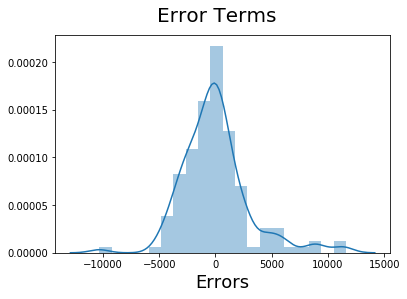

In [52]:
# Residual Analysis of train data
# To check if the error terms are also normally distributed
y_train_price = lr.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [53]:
# Since the error is very much normally distributed, our assumptions for linear regression are valid, 
# thus proceeding to make predictions using final model on test data

# Applying the scaling on the test sets
df_test[num_col] = scaler.transform(df_test[num_col])

# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [54]:
# Adding constant variable to test dataframe
X_test_m20 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m20 = X_test_m20[X_train_lm.columns]

# Making predictions using the fourth model
y_pred_m20 = lr.predict(X_test_m20)

Text(0, 0.5, 'y_pred')

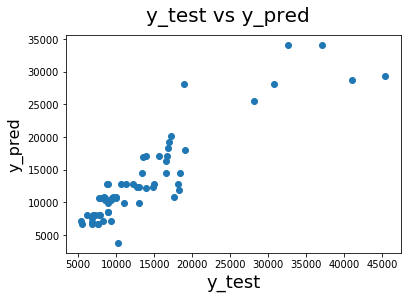

In [55]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m20)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

`price = 2898.193449 + (20488.254110 * enginelocation_rear) + (27169.921126 * carwidth) - (4080.755637 * cylindernumber_four) + (10206.543892 * carCompany_bmw) + (9780.957585 * cylindernumber_twelve)`

In [56]:
# Calculating the R-squared score on the test set.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m20)

0.8037251134697132

----

## Visualization and Conclusion of final model

Text(0, 0.5, 'Car Price')

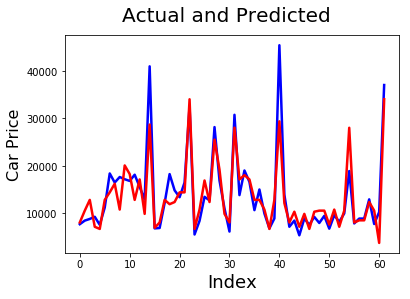

In [57]:
#Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_m20, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                           # Y-label

Overall we have a decent model. Our Business requirement was to help the company's management to understand the car pricing and its dependencies in the new market so that they can come up with a good business strategy.
The car pricing is dependent upon following parameters:
    - enginelocation
    - carwidth
    - cylindernumber
    - carCompany

Mathematically, car pricing was well explained by the following model:

***price = 2898.193449 + (20488.254110 * enginelocation_rear) + (27169.921126 * carwidth) - (4080.755637 * cylindernumber_four) + (10206.543892 * carCompany_bmw) + (9780.957585 * cylindernumber_twelve)***